# [ 국내 총생산(GDP)에 미치는 요인 분석 ]
 > **다중회귀분석 + 분산분석(ANOVA)**
### OECD 국가 대상(2018년)
- data 출처 : KOSIS(국가 통계 포털)    
https://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_02_01_01&vwcd=MT_RTITLE&parmTabId=M_02_01_01#SelectStatsBoxDiv     

### Column 설명 (2018년 기준)
- **국내총생산(GDP) : Target**
> 1년동안 한 국가에서 생산된 재화와 용역의 시장가치를 합한 것. 한 나라의 경제 규모등을 나타내는 국민 소득의 지표임(=지역 내 총생산, GRDP)
- GDP 성장률
- 수출액
- 수입액
- 총인구
- 실업률
- 소비자물가지수
>  가정이 소비하기 위해 구입하는 재화와 용역의 평균 가격을 측정한 지수(인플레이션 영향 조정 가능)
- 인터넷 이용률
> ICT 발전지수 등 중요한 국제지수 산출에 활용

In [57]:
import pandas as pd
import numpy as np

data = pd.read_csv('new_data.csv', encoding='cp949')

In [58]:
data.head() # OECD 국가들의 data

,국가별,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수
0,헝가리,157.9,123815,115979,9708,117.7,76.1,179.031
1,한국,1725.2,604860,535202,51607,104.5,95.9,115.704
2,핀란드,275.9,75869,78624,5523,111.2,88.9,115.051
3,프랑스,2787.9,581773,671434,64991,108.8,82.0,111.781
4,폴란드,587.1,263494,268880,37922,111.6,77.5,114.101


In [59]:
data.describe()

,국내총생산,수출액,수입액,총인구,소비자물가지수,인터넷이용률,주가지수
count,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000
mean,1481.020000,3.051442e+05,3.278726e+05,34851.942857,115.722857,85.468571,119.825400
std,3520.651538,3.924416e+05,4.886209e+05,59203.858680,16.857780,8.537487,24.112139
min,25.700000,1.180000e+02,1.170000e+02,337.000000,99.200000,62.300000,88.734000
25%,229.700000,4.305250e+04,5.754000e+04,5430.500000,109.400000,80.250000,108.504000
50%,434.200000,1.659380e+05,1.705920e+05,10522.000000,112.900000,86.500000,112.654000
75%,1426.800000,4.598970e+05,4.617205e+05,48177.000000,116.950000,90.900000,124.407000
max,20580.200000,1.664085e+06,2.614327e+06,327096.000000,203.500000,99.000000,211.054000


In [60]:
# ols 모듈(statsmodels)
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [61]:
data.columns

Index(['국가별', '국내총생산', '수출액', '수입액', '총인구', '소비자물가지수', '인터넷이용률', '주가지수'], dtype='object')

In [62]:
# 스케일링(수출, 수입, 총인구 너무 커서)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
data['수출액'] = standardScaler.fit_transform(data['수출액'].values.reshape(-1,1))
data['수입액'] = standardScaler.fit_transform(data['수입액'].values.reshape(-1,1))
data['총인구'] = standardScaler.fit_transform(data['총인구'].values.reshape(-1,1))

In [63]:
# 스케일 후
model = smf.ols(formula = '국내총생산 ~ 총인구 + 수출액 + 수입액 + 소비자물가지수 + 주가지수 + 인터넷이용률', data = data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  국내총생산   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     344.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):           6.76e-25
Time:                        11:27:48   Log-Likelihood:                -259.46
No. Observations:                  35   AIC:                             532.9
Df Residuals:                      28   BIC:                             543.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1579.5353   1189.358      1.328      0.195    -856.754    4015.825
총인구         1688.6996    317.423      5.320      0.000    1038.488    2338.911
수출액        -2171.0324    307.478     -7.061      0.000   -2800.873   -1541.192
수입액         3732.6143    536.355      6.959      0.000    2633.941    4831.288
소비자물가지수      -19.7197      5.495     -3.589      0.001     -30.976      -8.464
주가지수           5.7508      3.352      1.716      0.097      -1.115      12.616
인터넷이용률        17.4850     10.806      1.618      0.117      -4.649      39.619
==============================================================================
Omnibus:                        6.931   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                5.453
Skew:                          -0.788   Prob(JB):                       0.0655
Kurtosis:                       4.120   Cond. No.                     2.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
res = ols('국내총생산 ~ 총인구 + 수출액 + 수입액 + 소비자물가지수 + 인터넷이용률 + 주가지수', data=data).fit()
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(res).cooks_distance

In [69]:
fitted = res.predict(data)
residual = data['국내총생산'] - fitted

In [71]:
data['fit'] = fitted
data['e'] = residual

In [81]:
# SSE, SSR, SST

mean_of_y = np.mean(data['국내총생산'])

SSE = sum(np.power(data['e'], 2))
SSR = sum([np.power(i - mean_of_y,2) for i in data['fit']]) # 잔차제곱합

SST = SSE + SSR

print(SSE)
print(SSR)
print(SST)

5630576.695802281
415798989.86019266
421429566.5559949


In [82]:
R = SSR/SST
print(R)

0.9866393410841663


In [50]:
# cook's distance
cd.sort_values(ascending=False).head()

25    37.103181
29     1.328123
6      0.241364
16     0.150189
4      0.112706
dtype: float64

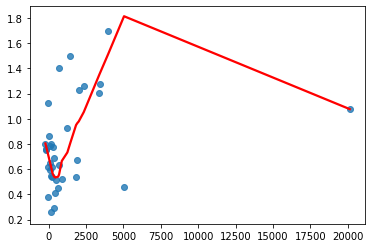

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

fitted = res.predict(data)
residual = data['국내총생산'] - fitted

sr = scipy.stats.zscore(residual)

# 등분산성 검정
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

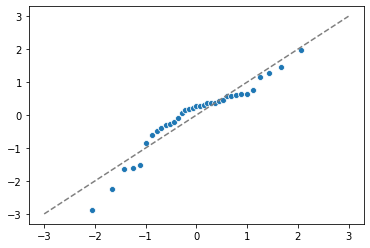

In [52]:
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

In [54]:
# 샤피로검정 : 정규성을 대부분 만족
scipy.stats.shapiro(residual)

(0.9242371916770935, 0.018920784816145897)